In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
os.chdir("/content/gdrive/My Drive")
#dir()
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install netcdf4
!pip install "basemap == 1.3.0b1" "basemap-data == 1.3.0b1" "basemap-data-hires == 1.3.0b1"
!pip install basemap
from netCDF4 import Dataset
from netCDF4 import num2date
from mpl_toolkits.basemap import Basemap
import mpl_toolkits.basemap as basemap
import getpass

Mounted at /content/gdrive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 880 kB 7.7 MB/s 
     |████████████████████████████████| 30.5 MB 88.2 MB/s 
     |████████████████████████████████| 91.1 MB 1.2 MB/s 
     |████████████████████████████████| 7.7 MB 66.3 MB/s 
     |████████████████████████████████| 219 kB 23.6 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=a3d9b0b3b4dffcc57170a2c7c389a8365cb6b693afb30144ce571873e22747db
  Stored in directory: /root/.cache/pip/wheels/1f/1b/b5/54affbefc8a7e2bdf1da000fc576b8a1c91338f1f327a04f4c
Successfully built pyshp


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Cargar datos

## Viento

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_Viento/Benguela/Data_anual/'
ifile = 'GLOBAL_REANALYSIS_PHY_Viento.nc' # Elegir el archivo .nc
d1_C_W = xr.open_dataset(ifile)
#d1_C_W=d1_C_W.sel(time=filtro_meses(d1_C_W['time.month']))
d1_C_W.lon.values[d1_C_W.lon.values < 0] = d1_C_W.lon.values[d1_C_W.lon.values < 0] + 360 # convertir a 0-360 ªE
lat2d, lon2d = d1_C_W['lat'].values,d1_C_W['lon'].values #vectores 2D lat y 2D lon

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_Viento/Benguela/Data_anual


In [ ]:
d1_C_W

<xarray.Dataset>
Dimensions:         (time: 9861, lat: 121, lon: 81)
Coordinates:
  * time            (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31
  * lat             (lat) float32 -40.0 -39.75 -39.5 ... -10.5 -10.25 -10.0
  * lon             (lon) float32 5.0 5.25 5.5 5.75 ... 24.25 24.5 24.75 25.0
Data variables:
    eastward_wind   (time, lat, lon) float64 ...
    northward_wind  (time, lat, lon) float64 ...

In [ ]:
tiempos= d1_C_W.time.values
tiempos

array(['1993-01-01T00:00:00.000000000', '1993-01-02T00:00:00.000000000',
       '1993-01-03T00:00:00.000000000', ...,
       '2019-12-29T00:00:00.000000000', '2019-12-30T00:00:00.000000000',
       '2019-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

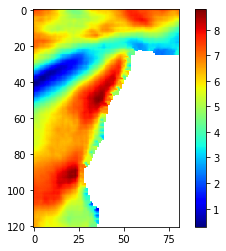

In [ ]:
plt.imshow(np.sqrt(d1_C_W.eastward_wind.values[0,:,:]**2 + d1_C_W.northward_wind.values[0,:,:]**2), cmap='jet')
plt.colorbar()

In [ ]:
#~mask sobre tierra
indices=np.where(~np.isnan(d1_C_W.eastward_wind.values[0,:,:])== True,1, np.nan)
indices

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ...,
       [ 1.,  1.,  1., ..., nan, nan, nan],
       [ 1.,  1.,  1., ..., nan, nan, nan],
       [ 1.,  1.,  1., ..., nan, nan, nan]])

In [ ]:
d1_C_W.sel(lon=11.75,lat=-18.5).eastward_wind.drop(['lat','lon'])

<xarray.DataArray 'eastward_wind' (time: 9861)>
array([-0.995117, -1.834961, -0.390137, ..., -3.037598, -2.672363, -2.905029])
Coordinates:
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31

In [ ]:
# Cap Frio: lat=-18.5 S, lon= 11.75 E  --- REAL 18°27′00.00″S 12°01′00.00″E
# Luderitz lat= -26.5 S, lon= 14.75 E --- REAL   26°38'53.02"S, 15°9'33.98"E
# Walvis Bay lat= -22.5 S, lon= 14.25 E   --- REAL 22°51′36″S 14°29′42″E
# Namaqualand lat= -30.5, lon= 17.25  --- REAL 30° 5' 16.0692'' S and 17° 34' 50.4768'' E
# Saint Elena Bay lat= -32.5 S, lon=18.0 E  --- REAL 32°45′30″S 18°01′40″E
# Cape Town lat= -33.5 S, lon=18.0 E --- REAL 33°55'7.8996'S and 18° 25' 23.8800'' E


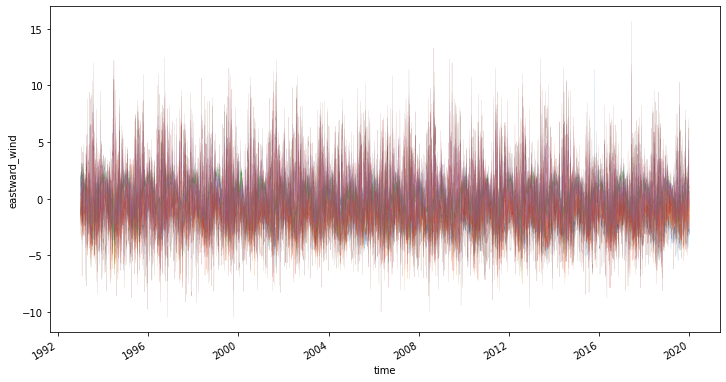

In [ ]:
U_Frio= d1_C_W.sel(lon=11.75,lat=-18.5).eastward_wind.drop(['lat','lon'])
U_Luderitz= d1_C_W.sel(lon=14.75,lat=-26.5).eastward_wind.drop(['lat','lon'])
U_Walvis= d1_C_W.sel(lon=14.25,lat=-22.5).eastward_wind.drop(['lat','lon'])
U_Namaqualand= d1_C_W.sel(lon=17.25,lat=-30.5).eastward_wind.drop(['lat','lon'])
U_Elena= d1_C_W.sel(lon=18,lat=-32.5).eastward_wind.drop(['lat','lon'])
U_Cape= d1_C_W.sel(lon=18,lat=-33.5).eastward_wind.drop(['lat','lon'])
plt.figure(figsize=(12,6))
U_Frio.plot(linewidth=0.1)
U_Luderitz.plot(linewidth=0.1)
U_Walvis.plot(linewidth=0.1)
U_Namaqualand.plot(linewidth=0.1)
U_Elena.plot(linewidth=0.1)
U_Cape.plot(linewidth=0.1)

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_U=pd.concat([U_Frio.to_dataframe(),U_Luderitz.to_dataframe(),U_Walvis.to_dataframe(),U_Namaqualand.to_dataframe(),U_Elena.to_dataframe(),U_Cape.to_dataframe()],axis=1)
df_U.columns=['Cap Frio','Luderitz','Walvis Bay','Namaqualand','Saint Elena Bay','Cape Town']
df_U.to_csv('U_Benguela.csv',index=True,sep=',')
df_U.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Cap Frio,Luderitz,Walvis Bay,Namaqualand,Saint Elena Bay,Cape Town
time,,,,,,
1993-01-01,-0.995117,-0.090088,1.280029,-1.670166,0.557617,-0.739990
1993-01-02,-1.834961,0.062500,0.900146,-2.195068,-1.135010,-3.064941
1993-01-03,-0.390137,-0.040039,0.790039,-1.867432,-0.739746,-3.152344
1993-01-04,0.604980,-0.445068,0.227539,0.457520,0.580322,-1.524902
1993-01-05,2.047363,-1.747559,1.912354,-0.252441,1.590332,-0.067627


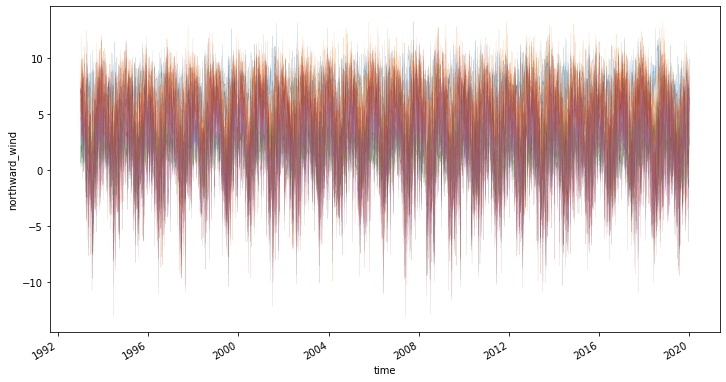

In [ ]:
V_Frio= d1_C_W.sel(lon=11.75,lat=-18.5).northward_wind.drop(['lat','lon'])
V_Luderitz= d1_C_W.sel(lon=14.75,lat=-26.5).northward_wind.drop(['lat','lon'])
V_Walvis= d1_C_W.sel(lon=14.25,lat=-22.5).northward_wind.drop(['lat','lon'])
V_Namaqualand= d1_C_W.sel(lon=17.25,lat=-30.5).northward_wind.drop(['lat','lon'])
V_Elena= d1_C_W.sel(lon=18,lat=-32.5).northward_wind.drop(['lat','lon'])
V_Cape= d1_C_W.sel(lon=18,lat=-33.5).northward_wind.drop(['lat','lon'])
plt.figure(figsize=(12,6))
V_Frio.plot(linewidth=0.1)
V_Luderitz.plot(linewidth=0.1)
V_Walvis.plot(linewidth=0.1)
V_Namaqualand.plot(linewidth=0.1)
V_Elena.plot(linewidth=0.1)
V_Cape.plot(linewidth=0.1)

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_P=pd.concat([P_Frio.to_dataframe(),P_Luderitz.to_dataframe(),P_Walvis.to_dataframe(),P_Namaqualand.to_dataframe(),P_Elena.to_dataframe(),P_Cape.to_dataframe()],axis=1)
df_P.columns=['Cap Frio','Luderitz','Walvis Bay','Namaqualand','Saint Elena Bay','Cape Town']
df_P.to_csv('P_Benguela.csv',index=True,sep=',')
df_P.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Cap Frio,Luderitz,Walvis Bay,Namaqualand,Saint Elena Bay,Cape Town
time,,,,,,
1993-01-01,6.925049,6.857422,3.122559,6.877686,4.392578,6.167480
1993-01-02,6.797607,4.854980,2.414795,7.227539,4.747559,6.762451
1993-01-03,4.939941,3.070068,1.209961,5.915039,3.700195,7.287354
1993-01-04,4.327637,4.875000,2.307617,4.489990,2.520020,6.620361
1993-01-05,0.720215,8.012695,0.674805,6.235107,3.812500,7.337402


In [ ]:
# Hovmoller
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
U_H=d1_C_W.groupby('lat').mean('lon').eastward_wind.to_dataframe().reset_index()
V_H=d1_C_W.groupby('lat').mean('lon').northward_wind.to_dataframe().reset_index()
U_H.to_csv('Hovmoller_U_Benguela.csv',sep=',')
V_H.to_csv('Hovmoller_V_Benguela.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Presion

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/DATA_PRESION_ATMOSFERICA/Benguela/'
ifile = 'Benguela_Presion_atmosferica.nc' # Elegir el archivo .nc
var = 'sp' # elegir la variable de interes (Pascales)
d1_P = xr.open_dataset(ifile) # filtrar la variable del archivo de interes
d1_P=d1_P.rename(name_dict={'longitude':'lon','latitude':'lat'}) # cambiar nombre de lat y lon
d1_P= d1_P[var] #seleccionar variable de interes
#d1_P=d1_P.sel(lon=slice(-130,-110),lat=slice(20,50)) # recortar el xarray
d1_P=d1_P.reindex(lat=list(reversed(d1_P.lat))) # Invertir valores de lat para qye queden iguales
#d1_P=d1_P.assign_coords({"lon": d1_P.lon + 360}) # cambiar coordenadas de lon
#d1_P=d1_P.sel(time=filtro_meses(d1_P['time.month']))
d1_P=d1_P.sel(lon=slice(5,25),lat=slice(-40,-10)) # recortar el xarray
d1_P.values= d1_P.values*indices # masking sobre tierra
d1_P

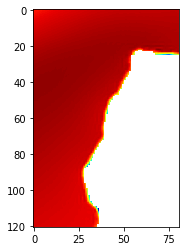

In [ ]:
plt.imshow(d1_P.values[0,:,:],cmap='jet')

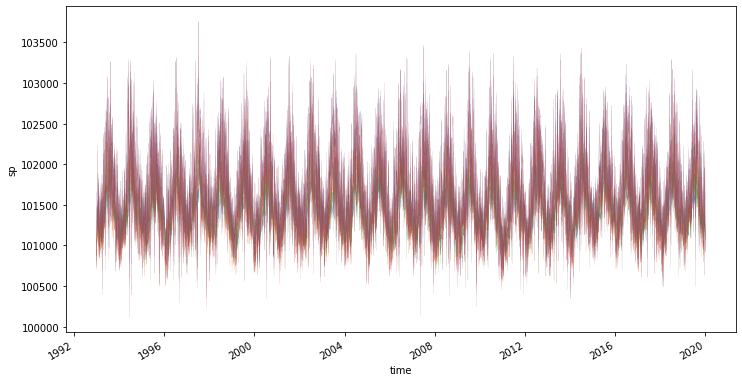

In [ ]:
P_Frio= d1_P.sel(lon=11.75,lat=-18.5).drop(['lat','lon'])
P_Luderitz= d1_P.sel(lon=14.75,lat=-26.5).drop(['lat','lon'])
P_Walvis= d1_P.sel(lon=14.25,lat=-22.5).drop(['lat','lon'])
P_Namaqualand= d1_P.sel(lon=17.25,lat=-30.5).drop(['lat','lon'])
P_Elena= d1_P.sel(lon=18,lat=-32.5).drop(['lat','lon'])
P_Cape= d1_P.sel(lon=18,lat=-33.5).drop(['lat','lon'])
plt.figure(figsize=(12,6))
P_Frio.plot(linewidth=0.1)
P_Luderitz.plot(linewidth=0.1)
P_Walvis.plot(linewidth=0.1)
P_Namaqualand.plot(linewidth=0.1)
P_Elena.plot(linewidth=0.1)
P_Cape.plot(linewidth=0.1)

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_P=pd.concat([P_Frio.to_dataframe(),P_Luderitz.to_dataframe(),P_Walvis.to_dataframe(),P_Namaqualand.to_dataframe(),P_Elena.to_dataframe(),P_Cape.to_dataframe()],axis=1)
df_P.columns=['Cap Frio','Luderitz','Walvis Bay','Namaqualand','Saint Elena Bay','Cape Town']
df_P.to_csv('P_Benguela.csv',index=True,sep=',')
df_P.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Cap Frio,Luderitz,Walvis Bay,Namaqualand,Saint Elena Bay,Cape Town
time,,,,,,
1993-01-01,101434.882812,101389.820312,101482.382812,101478.500000,101653.273438,101670.054688
1993-01-02,101288.437500,101147.250000,101280.960938,101168.414062,101418.656250,101484.335938
1993-01-03,101075.101562,100867.242188,101004.750000,100747.906250,100965.250000,101002.492188
1993-01-04,100879.898438,100772.679688,100808.570312,100732.250000,100754.242188,100702.789062
1993-01-05,101068.992188,100746.757812,100939.500000,100954.460938,101057.898438,101065.835938


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
P_H=d1_P.groupby('lat').mean('lon').to_dataframe().reset_index()
P_H.to_csv('Hovmoller_P_Benguela.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Temperatura

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/DATA_TEMPERATURA_ATMOSFERICA/Benguela/'
ifile = 'Benguela_Taire.nc' # Elegir el archivo .nc
var='t2m'
d1_T= xr.open_dataset(ifile)
d1_T=d1_T.rename(name_dict={'longitude':'lon','latitude':'lat'}) # cambiar nombre de lat y lon
d1_T= d1_T[var] #seleccionar variable de interes
d1_T=d1_T.reindex(lat=list(reversed(d1_T.lat))) # Invertir valores de lat para qye queden iguales
#d1_T=d1_T.assign_coords({"lon": d1_T.lon + 360}) # cambiar coordenadas de lon
#d1_T=d1_T.sel(time=filtro_meses(d1_T['time.month']))
d1_T=d1_T.sel(lon=slice(5,25),lat=slice(-40,-10)) # recortar el xarray
d1_T.values= d1_T.values*indices # masking sobre tierra
d1_T

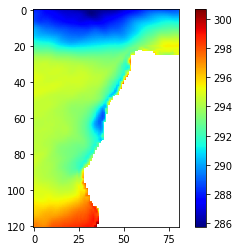

In [ ]:
plt.imshow(d1_T.values[12,:,:],cmap='jet')
plt.colorbar()

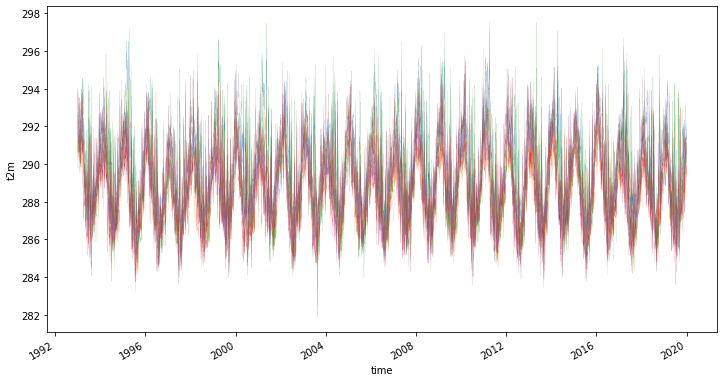

In [ ]:
T_Frio= d1_T.sel(lon=11.75,lat=-18.5).drop(['lat','lon'])
T_Luderitz= d1_T.sel(lon=14.75,lat=-26.5).drop(['lat','lon'])
T_Walvis= d1_T.sel(lon=14.25,lat=-22.5).drop(['lat','lon'])
T_Namaqualand= d1_T.sel(lon=17.25,lat=-30.5).drop(['lat','lon'])
T_Elena= d1_T.sel(lon=18,lat=-32.5).drop(['lat','lon'])
T_Cape= d1_T.sel(lon=18,lat=-33.5).drop(['lat','lon'])
plt.figure(figsize=(12,6))
T_Frio.plot(linewidth=0.1)
T_Luderitz.plot(linewidth=0.1)
T_Walvis.plot(linewidth=0.1)
T_Namaqualand.plot(linewidth=0.1)
T_Elena.plot(linewidth=0.1)
T_Cape.plot(linewidth=0.1)

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_T=pd.concat([T_Frio.to_dataframe(),T_Luderitz.to_dataframe(),T_Walvis.to_dataframe(),T_Namaqualand.to_dataframe(),T_Elena.to_dataframe(),T_Cape.to_dataframe()],axis=1)
df_T.columns=['Cap Frio','Luderitz','Walvis Bay','Namaqualand','Saint Elena Bay','Cape Town']
df_T.to_csv('T_Benguela.csv',index=True,sep=',')
df_T.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Cap Frio,Luderitz,Walvis Bay,Namaqualand,Saint Elena Bay,Cape Town
time,,,,,,
1993-01-01,290.840881,290.283051,289.815704,290.624084,291.237457,291.570068
1993-01-02,290.822266,290.760406,290.043549,292.639008,293.528839,293.195923
1993-01-03,291.002594,291.194122,290.450348,292.559784,293.918579,294.056000
1993-01-04,291.078583,291.195770,290.763367,291.089752,292.647369,293.861298
1993-01-05,290.641479,290.767731,290.856567,291.212585,292.447479,293.372894


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
T_H=d1_T.groupby('lat').mean('lon').to_dataframe().reset_index()
T_H.to_csv('Hovmoller_T_Benguela.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Radiacion onda corta (Qsw)

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/DATA_RADIACION_ONDA_CORTA(QSW)/Benguela/'
ifile = 'Benguela_QSW.nc' # Elegir el archivo .nc
var='ssrd'
d1_Q= xr.open_dataset(ifile)
d1_Q=d1_Q.rename(name_dict={'longitude':'lon','latitude':'lat'}) # cambiar nombre de lat y lon
d1_Q= d1_Q[var] #seleccionar variable de interes
d1_Q=d1_Q.reindex(lat=list(reversed(d1_Q.lat))) # Invertir valores de lat para qye queden iguales
#d1_Q=d1_Q.assign_coords({"lon": d1_Q.lon + 360}) # cambiar coordenadas de lon
#d1_Q=d1_Q.sel(time=filtro_meses(d1_Q['time.month']))
d1_Q=d1_Q.sel(lon=slice(5,25),lat=slice(-40,-10)) # recortar el xarray
d1_Q.values= d1_Q.values*indices # masking sobre tierra
d1_Q

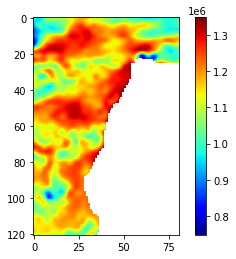

In [ ]:
plt.imshow(d1_Q.values[12,:,:],cmap='jet')
plt.colorbar()

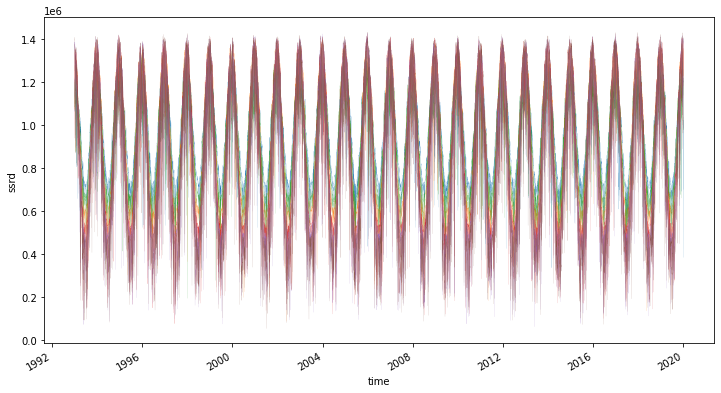

In [ ]:
Q_Frio= d1_Q.sel(lon=11.75,lat=-18.5).drop(['lat','lon'])
Q_Luderitz= d1_Q.sel(lon=14.75,lat=-26.5).drop(['lat','lon'])
Q_Walvis= d1_Q.sel(lon=14.25,lat=-22.5).drop(['lat','lon'])
Q_Namaqualand= d1_Q.sel(lon=17.25,lat=-30.5).drop(['lat','lon'])
Q_Elena= d1_Q.sel(lon=18,lat=-32.5).drop(['lat','lon'])
Q_Cape= d1_Q.sel(lon=18,lat=-33.5).drop(['lat','lon'])
plt.figure(figsize=(12,6))
Q_Frio.plot(linewidth=0.1)
Q_Luderitz.plot(linewidth=0.1)
Q_Walvis.plot(linewidth=0.1)
Q_Namaqualand.plot(linewidth=0.1)
Q_Elena.plot(linewidth=0.1)
Q_Cape.plot(linewidth=0.1)

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_Q=pd.concat([Q_Frio.to_dataframe(),Q_Luderitz.to_dataframe(),Q_Walvis.to_dataframe(),Q_Namaqualand.to_dataframe(),Q_Elena.to_dataframe(),Q_Cape.to_dataframe()],axis=1)
df_Q.columns=['Cap Frio','Luderitz','Walvis Bay','Namaqualand','Saint Elena Bay','Cape Town']
df_Q.to_csv('Q_Benguela.csv',index=True,sep=',')
df_Q.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Cap Frio,Luderitz,Walvis Bay,Namaqualand,Saint Elena Bay,Cape Town
time,,,,,,
1993-01-01,1219410.875,1341694.875,1098812.875,1.346492e+06,1345186.875,1391655.500
1993-01-02,1131215.625,1327283.125,1163425.000,1.348891e+06,1383429.625,1407372.000
1993-01-03,1211190.125,1306788.875,1199747.500,1.341003e+06,1365637.500,1393725.625
1993-01-04,1062801.125,1270954.125,1164569.000,1.162248e+06,1294817.625,1317725.125
1993-01-05,1077131.125,1071610.000,1082870.375,9.386321e+05,1121981.875,1251179.000


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
Q_H=d1_Q.groupby('lat').mean('lon').to_dataframe().reset_index()
Q_H.to_csv('Hovmoller_Q_Benguela.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Corrientes

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_Corrientes/Benguela/Data_anual/'
ifile = 'GLOBAL_REANALYSIS_PHY_Corrientes.nc' # Elegir el archivo .nc
d1_C = xr.open_dataset(ifile)
#d1_C=d1_C.sel(time=filtro_meses(d1_C['time.month']))
d1_C.lon.values[d1_C.lon.values < 0] = d1_C.lon.values[d1_C.lon.values < 0] + 360 # convertir a 0-360 ªE
lat2d, lon2d = d1_C['lat'].values,d1_C['lon'].values #vectores 2D lat y 2D lon

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_Corrientes/Benguela/Data_anual


In [ ]:
d1_C

<xarray.Dataset>
Dimensions:  (lon: 81, lat: 121, time: 9859)
Coordinates:
  * lon      (lon) float32 5.0 5.25 5.5 5.75 6.0 ... 24.0 24.25 24.5 24.75 25.0
  * lat      (lat) float32 -40.0 -39.75 -39.5 -39.25 ... -10.5 -10.25 -10.0
    depth    float32 ...
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31
Data variables:
    U        (time, lat, lon) float32 ...
    V        (time, lat, lon) float32 ...
Attributes: (12/15)
    product:                       GLOBAL_REANALYSIS_PHY_001_031
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    area:                          Global
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    Conventions:                   CF-1.6
    credit:                        E.U. Copernicus Marine Service Information...
    ...                            ...
    institution:                   Mercator Ocean
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    history:                       Creation 2022-Mar-05 02:35:00 GMT+0200
    title:                         Daily mean fields for product GLOBAL_REANA...
    source:                        Copernicus Marine Service
    dataset:                       global-reanalysis-phy-001-031-grepv2-daily

In [ ]:
tiempos= d1_C.time.values
tiempos

array(['1993-01-01T00:00:00.000000000', '1993-01-02T00:00:00.000000000',
       '1993-01-03T00:00:00.000000000', ...,
       '2019-12-29T00:00:00.000000000', '2019-12-30T00:00:00.000000000',
       '2019-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

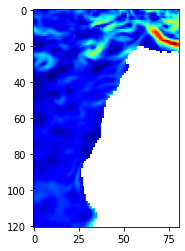

In [ ]:
plt.imshow(np.sqrt(d1_C.U.values[0,:,:]**2 + d1_C.V.values[0,:,:]**2), cmap='jet')

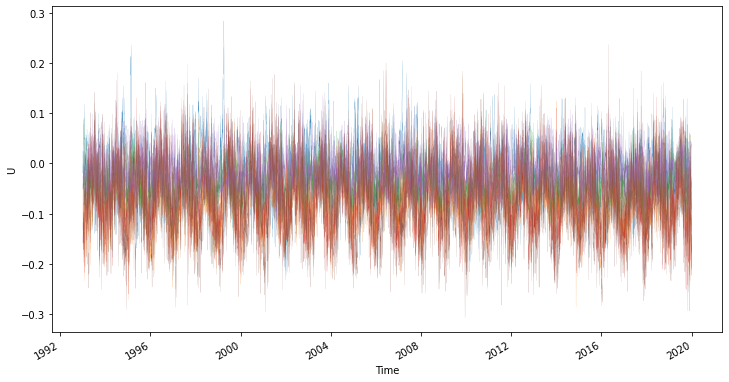

In [ ]:
U_Frio= d1_C.sel(lon=11.75,lat=-18.5).U.drop(['lat','lon','depth'])
U_Luderitz= d1_C.sel(lon=14.75,lat=-26.5).U.drop(['lat','lon','depth'])
U_Walvis= d1_C.sel(lon=14.25,lat=-22.5).U.drop(['lat','lon','depth'])
U_Namaqualand= d1_C.sel(lon=17.25,lat=-30.5).U.drop(['lat','lon','depth'])
U_Elena= d1_C.sel(lon=18,lat=-32.5).U.drop(['lat','lon','depth'])
U_Cape= d1_C.sel(lon=18,lat=-33.5).U.drop(['lat','lon','depth'])
plt.figure(figsize=(12,6))
U_Frio.plot(linewidth=0.1)
U_Luderitz.plot(linewidth=0.1)
U_Walvis.plot(linewidth=0.1)
U_Namaqualand.plot(linewidth=0.1)
U_Elena.plot(linewidth=0.1)
U_Cape.plot(linewidth=0.1)

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_U=pd.concat([U_Frio.to_dataframe(),U_Luderitz.to_dataframe(),U_Walvis.to_dataframe(),U_Namaqualand.to_dataframe(),U_Elena.to_dataframe(),U_Cape.to_dataframe()],axis=1)
df_U.columns=['Cap Frio','Luderitz','Walvis Bay','Namaqualand','Saint Elena Bay','Cape Town']
df_U.to_csv('UO_Benguela.csv',index=True,sep=',')
df_U.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Cap Frio,Luderitz,Walvis Bay,Namaqualand,Saint Elena Bay,Cape Town
time,,,,,,
1993-01-01,0.025423,-0.112942,-0.049759,-0.158995,-0.024370,-0.115804
1993-01-02,-0.019187,-0.066059,-0.045356,-0.149966,-0.039345,-0.131598
1993-01-03,-0.002095,-0.046332,-0.040020,-0.140033,-0.054117,-0.133241
1993-01-04,0.001578,-0.063555,-0.054466,-0.097019,-0.037872,-0.119107
1993-01-05,0.087997,-0.134152,-0.028506,-0.129101,-0.035140,-0.125592


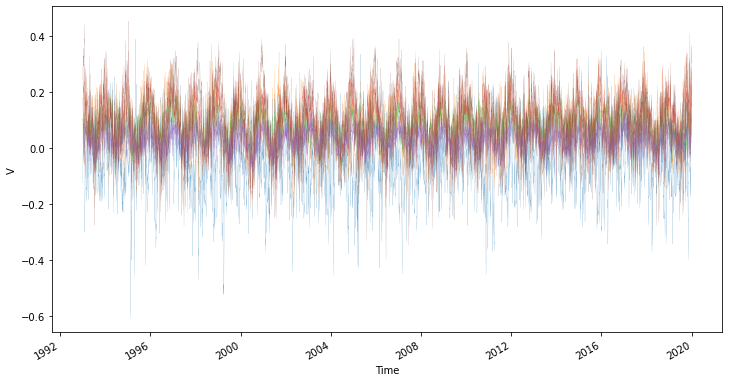

In [ ]:
V_Frio= d1_C.sel(lon=11.75,lat=-18.5).V.drop(['lat','lon','depth'])
V_Luderitz= d1_C.sel(lon=14.75,lat=-26.5).V.drop(['lat','lon','depth'])
V_Walvis= d1_C.sel(lon=14.25,lat=-22.5).V.drop(['lat','lon','depth'])
V_Namaqualand= d1_C.sel(lon=17.25,lat=-30.5).V.drop(['lat','lon','depth'])
V_Elena= d1_C.sel(lon=18,lat=-32.5).V.drop(['lat','lon','depth'])
V_Cape= d1_C.sel(lon=18,lat=-33.5).V.drop(['lat','lon','depth'])
plt.figure(figsize=(12,6))
V_Frio.plot(linewidth=0.1)
V_Luderitz.plot(linewidth=0.1)
V_Walvis.plot(linewidth=0.1)
V_Namaqualand.plot(linewidth=0.1)
V_Elena.plot(linewidth=0.1)
V_Cape.plot(linewidth=0.1)

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_V=pd.concat([V_Frio.to_dataframe(),V_Luderitz.to_dataframe(),V_Walvis.to_dataframe(),V_Namaqualand.to_dataframe(),V_Elena.to_dataframe(),V_Cape.to_dataframe()],axis=1)
df_V.columns=['Cap Frio','Luderitz','Walvis Bay','Namaqualand','Saint Elena Bay','Cape Town']
df_V.to_csv('VO_Benguela.csv',index=True,sep=',')
df_V.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Cap Frio,Luderitz,Walvis Bay,Namaqualand,Saint Elena Bay,Cape Town
time,,,,,,
1993-01-01,-0.124713,0.105416,0.100498,0.181092,0.044095,0.291460
1993-01-02,-0.077178,0.060521,0.105034,0.155712,0.025710,0.265752
1993-01-03,-0.001674,0.045432,0.094097,0.131635,0.014242,0.249445
1993-01-04,0.026963,0.056772,0.103521,0.114610,0.011282,0.199078
1993-01-05,-0.008863,0.116645,0.074207,0.134711,0.079267,0.215252


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
U_H=d1_C.groupby('lat').mean('lon').U.drop('depth').to_dataframe().reset_index()
V_H=d1_C.groupby('lat').mean('lon').V.drop('depth').to_dataframe().reset_index()
U_H.to_csv('Hovmoller_UO_Benguela.csv',sep=',')
V_H.to_csv('Hovmoller_VO_Benguela.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## SST

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/OSTIA_SST/Benguela/Data_anual/'
var = 'SST' # elegir la variable de interes
ifile = 'OSTIA_SST.nc' # Elegir el archivo .nc
d1_SST = xr.open_dataset(ifile)[var] # filtrar la variable del archivo de interes
#d1_SST=d1_SST.sel(time=filtro_meses(d1_SST['time.month']))
d1_SST.lon.values[d1_SST.lon.values < 0] = d1_SST.lon.values[d1_SST.lon.values < 0] + 360 # convertir a 0-360 ªE
d1_SST.coords['lon'] = (d1_SST.coords['lon'] + 180) % 360 - 180
d1_SST

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/OSTIA_SST/Benguela/Data_anual


<xarray.DataArray 'SST' (time: 9861, lat: 121, lon: 81)>
[96647661 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 5.0 5.25 5.5 5.75 6.0 ... 24.0 24.25 24.5 24.75 25.0
  * lat      (lat) float64 -40.0 -39.75 -39.5 -39.25 ... -10.5 -10.25 -10.0
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31

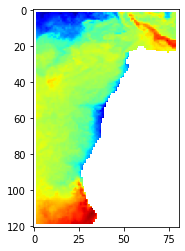

In [ ]:
plt.imshow(d1_SST.values[0,:,:],cmap='jet')

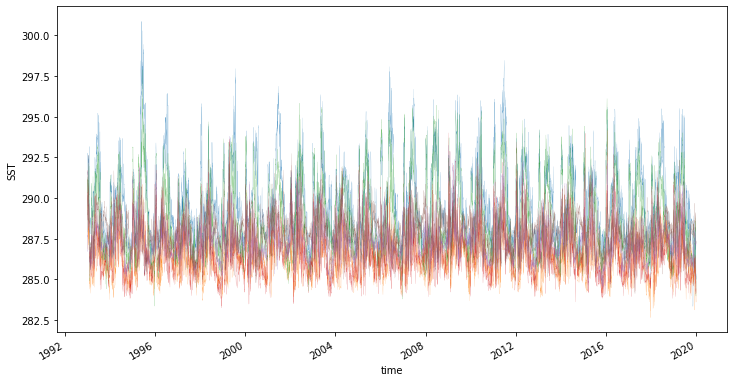

In [ ]:
T_Frio= d1_SST.sel(lon=11.75,lat=-18.5).drop(['lat','lon'])
T_Luderitz= d1_SST.sel(lon=14.75,lat=-26.5).drop(['lat','lon'])
T_Walvis= d1_SST.sel(lon=14.25,lat=-22.5).drop(['lat','lon'])
T_Namaqualand= d1_SST.sel(lon=17.25,lat=-30.5).drop(['lat','lon'])
T_Elena= d1_SST.sel(lon=18,lat=-32.5).drop(['lat','lon'])
T_Cape= d1_SST.sel(lon=18,lat=-33.5).drop(['lat','lon'])
plt.figure(figsize=(12,6))
T_Frio.plot(linewidth=0.1)
T_Luderitz.plot(linewidth=0.1)
T_Walvis.plot(linewidth=0.1)
T_Namaqualand.plot(linewidth=0.1)
T_Elena.plot(linewidth=0.1)
T_Cape.plot(linewidth=0.1)

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_T=pd.concat([T_Frio.to_dataframe(),T_Luderitz.to_dataframe(),T_Walvis.to_dataframe(),T_Namaqualand.to_dataframe(),T_Elena.to_dataframe(),T_Cape.to_dataframe()],axis=1)
df_T.columns=['Cap Frio','Luderitz','Walvis Bay','Namaqualand','Saint Elena Bay','Cape Town']
df_T.to_csv('SST_Benguela.csv',index=True,sep=',')
df_T.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Cap Frio,Luderitz,Walvis Bay,Namaqualand,Saint Elena Bay,Cape Town
time,,,,,,
1993-01-01,289.412500,286.884995,287.909995,288.665009,289.182478,290.195009
1993-01-02,291.619989,287.372494,290.944989,290.122492,288.232484,288.952507
1993-01-03,291.424990,287.389987,290.319992,290.349982,288.472500,289.262497
1993-01-04,291.594996,287.434993,290.457481,290.277496,287.082503,288.874999
1993-01-05,292.074997,287.742489,291.139972,289.682491,286.712494,288.629986


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
SST_H=d1_SST.groupby('lat').mean('lon').to_dataframe().reset_index()
SST_H.to_csv('Hovmoller_SST_Benguela.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Salinidad

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_SSS/Benguela/Data_anual/'
var = 'SSS' # elegir la variable de interes
ifile = 'GLOBAL_REANALYSIS_PHY_SSS.nc' # Elegir el archivo .nc
d1_S = xr.open_dataset(ifile)[var] # filtrar la variable del archivo de interes
#d1_S=d1_S.sel(time=filtro_meses(d1_S['time.month']))
d1_S.lon.values[d1_S.lon.values < 0] = d1_S.lon.values[d1_S.lon.values < 0] + 360 # convertir a 0-360 ªE
d1_S

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_SSS/Benguela/Data_anual


<xarray.DataArray 'SSS' (time: 9861, lat: 121, lon: 81)>
[96647661 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 5.0 5.25 5.5 5.75 6.0 ... 24.0 24.25 24.5 24.75 25.0
  * lat      (lat) float32 -40.0 -39.75 -39.5 -39.25 ... -10.5 -10.25 -10.0
    depth    float32 ...
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31

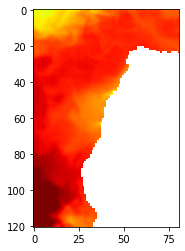

In [ ]:
plt.imshow(d1_S.values[0,:,:],cmap='jet',vmin=32, vmax=36)

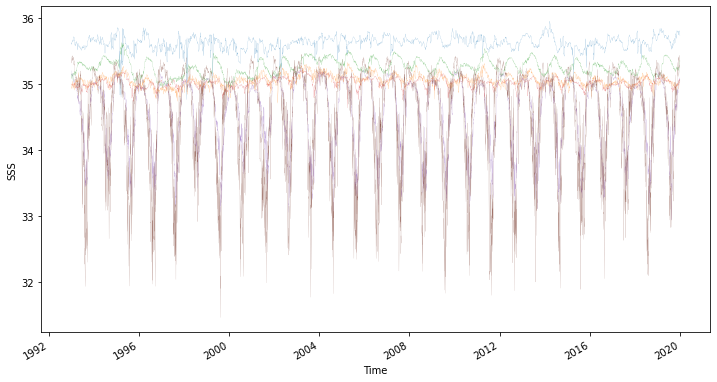

In [ ]:
S_Frio= d1_S.sel(lon=11.75,lat=-18.5).drop(['lat','lon','depth'])
S_Luderitz= d1_S.sel(lon=14.75,lat=-26.5).drop(['lat','lon','depth'])
S_Walvis= d1_S.sel(lon=14.25,lat=-22.5).drop(['lat','lon','depth'])
S_Namaqualand= d1_S.sel(lon=17.25,lat=-30.5).drop(['lat','lon','depth'])
S_Elena= d1_S.sel(lon=18,lat=-32.5).drop(['lat','lon','depth'])
S_Cape= d1_S.sel(lon=18,lat=-33.5).drop(['lat','lon','depth'])
plt.figure(figsize=(12,6))
S_Frio.plot(linewidth=0.1)
S_Luderitz.plot(linewidth=0.1)
S_Walvis.plot(linewidth=0.1)
S_Namaqualand.plot(linewidth=0.1)
S_Elena.plot(linewidth=0.1)
S_Cape.plot(linewidth=0.1)

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_S=pd.concat([S_Frio.to_dataframe(),S_Luderitz.to_dataframe(),S_Walvis.to_dataframe(),S_Namaqualand.to_dataframe(),S_Elena.to_dataframe(),S_Cape.to_dataframe()],axis=1)
df_S.columns=['Cap Frio','Luderitz','Walvis Bay','Namaqualand','Saint Elena Bay','Cape Town']
df_S.to_csv('S_Benguela.csv',index=True,sep=',')
df_S.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Cap Frio,Luderitz,Walvis Bay,Namaqualand,Saint Elena Bay,Cape Town
time,,,,,,
1993-01-01,35.601944,34.963673,35.162380,35.006615,35.205051,35.417721
1993-01-02,35.615685,34.956520,35.159576,35.002773,35.193443,35.405636
1993-01-03,35.624542,34.946239,35.153751,34.997795,35.177704,35.387466
1993-01-04,35.626766,34.935333,35.145248,34.994949,35.161327,35.359489
1993-01-05,35.623253,34.935410,35.137688,34.994335,35.153908,35.347080


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
SSS_H=d1_S.groupby('lat').mean('lon').drop('depth').to_dataframe().reset_index()
SSS_H.to_csv('Hovmoller_S_Benguela.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Oxigeno

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_BIO/Benguela/Data_anual/'
var = 'o2' # elegir la variable de interes
ifile = 'GLOBAL_REANALYSIS_BIO.nc' # Elegir el archivo .nc
d1_O = xr.open_dataset(ifile)[var] # filtrar la variable del archivo de interes
#d1_O=d1_O.sel(time=filtro_meses(d1_O['time.month']))
d1_O.lon.values[d1_O.lon.values < 0] = d1_O.lon.values[d1_O.lon.values < 0] + 360 # convertir a 0-360 ªE
d1_O

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_BIO/Benguela/Data_anual


<xarray.DataArray 'o2' (time: 9861, lat: 121, lon: 81)>
[96647661 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 5.0 5.25 5.5 5.75 6.0 ... 24.0 24.25 24.5 24.75 25.0
  * lat      (lat) float32 -40.0 -39.75 -39.5 -39.25 ... -10.5 -10.25 -10.0
    depth    float32 ...
  * time     (time) datetime64[ns] 1993-01-01T12:00:00 ... 2019-12-31T12:00:00
Attributes:
    long_name:      Dissolved Oxygen
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          mmol m-3
    unit_long:      millimoles of Oxygen per cubic meter
    valid_min:      0.24998258
    valid_max:      529.78735
    _ChunkSizes:    [  1  15 137 288]

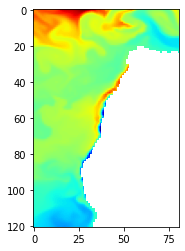

In [ ]:
plt.imshow(d1_O.values[0,:,:],cmap='jet')

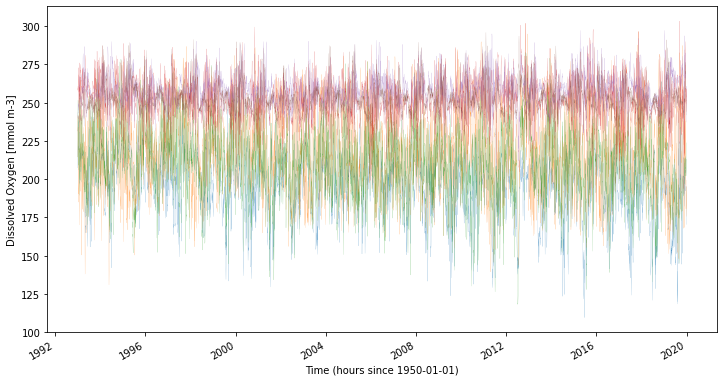

In [ ]:
O_Frio= d1_O.sel(lon=11.75,lat=-18.5).drop(['lat','lon','depth'])
O_Luderitz= d1_O.sel(lon=14.75,lat=-26.5).drop(['lat','lon','depth'])
O_Walvis= d1_O.sel(lon=14.25,lat=-22.5).drop(['lat','lon','depth'])
O_Namaqualand= d1_O.sel(lon=17.25,lat=-30.5).drop(['lat','lon','depth'])
O_Elena= d1_O.sel(lon=18,lat=-32.5).drop(['lat','lon','depth'])
O_Cape= d1_O.sel(lon=18,lat=-33.5).drop(['lat','lon','depth'])
plt.figure(figsize=(12,6))
O_Frio.plot(linewidth=0.1)
O_Luderitz.plot(linewidth=0.1)
O_Walvis.plot(linewidth=0.1)
O_Namaqualand.plot(linewidth=0.1)
O_Elena.plot(linewidth=0.1)
O_Cape.plot(linewidth=0.1)

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_O=pd.concat([O_Frio.to_dataframe(),O_Luderitz.to_dataframe(),O_Walvis.to_dataframe(),O_Namaqualand.to_dataframe(),O_Elena.to_dataframe(),O_Cape.to_dataframe()],axis=1)
df_O.columns=['Cap Frio','Luderitz','Walvis Bay','Namaqualand','Saint Elena Bay','Cape Town']
df_O.to_csv('O_Benguela.csv',index=True,sep=',')
df_O.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Cap Frio,Luderitz,Walvis Bay,Namaqualand,Saint Elena Bay,Cape Town
time,,,,,,
1993-01-01 12:00:00,207.317520,214.502060,214.398849,259.261322,239.968384,231.790634
1993-01-02 12:00:00,209.945618,222.451889,226.234100,258.389160,241.489014,231.387192
1993-01-03 12:00:00,212.255875,232.977600,238.032913,258.034790,243.205215,231.758362
1993-01-04 12:00:00,217.541794,241.669312,248.139481,260.348572,243.672363,232.574387
1993-01-05 12:00:00,225.336456,235.930756,251.504227,260.794495,243.700958,233.607407


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
O_H=d1_O.groupby('lat').mean('lon').drop('depth').to_dataframe().reset_index()
O_H.to_csv('Hovmoller_O_Benguela.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Clorofila

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_BIO/Benguela/Data_anual/'
var = 'chl' # elegir la variable de interes
ifile = 'GLOBAL_REANALYSIS_BIO.nc' # Elegir el archivo .nc
d1_CHL = xr.open_dataset(ifile)[var] # filtrar la variable del archivo de interes
#d1_CHL=d1_CHL.sel(time=filtro_meses(d1_CHL['time.month']))
d1_CHL.lon.values[d1_CHL.lon.values < 0] = d1_CHL.lon.values[d1_CHL.lon.values < 0] + 360 # convertir a 0-360 ªE
d1_CHL

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_BIO/Benguela/Data_anual


<xarray.DataArray 'chl' (time: 9861, lat: 121, lon: 81)>
[96647661 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 5.0 5.25 5.5 5.75 6.0 ... 24.0 24.25 24.5 24.75 25.0
  * lat      (lat) float32 -40.0 -39.75 -39.5 -39.25 ... -10.5 -10.25 -10.0
    depth    float32 ...
  * time     (time) datetime64[ns] 1993-01-01T12:00:00 ... 2019-12-31T12:00:00
Attributes:
    long_name:      Total Chlorophyll
    standard_name:  mass_concentration_of_chlorophyll_a_in_sea_water
    units:          mg m-3
    unit_long:      milligram of Chlorophyll per cubic meter
    valid_min:      0.0026485976
    valid_max:      14.423477
    _ChunkSizes:    [  1  15 137 288]

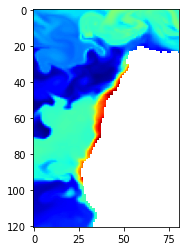

In [ ]:
plt.imshow(np.log10(d1_CHL.values[0,:,:]),cmap='jet')

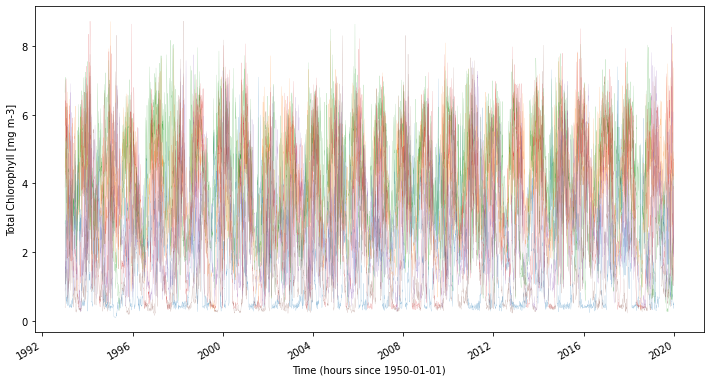

In [ ]:
CHL_Frio= d1_CHL.sel(lon=11.75,lat=-18.5).drop(['lat','lon','depth'])
CHL_Luderitz= d1_CHL.sel(lon=14.75,lat=-26.5).drop(['lat','lon','depth'])
CHL_Walvis= d1_CHL.sel(lon=14.25,lat=-22.5).drop(['lat','lon','depth'])
CHL_Namaqualand= d1_CHL.sel(lon=17.25,lat=-30.5).drop(['lat','lon','depth'])
CHL_Elena= d1_CHL.sel(lon=18,lat=-32.5).drop(['lat','lon','depth'])
CHL_Cape= d1_CHL.sel(lon=18,lat=-33.5).drop(['lat','lon','depth'])
plt.figure(figsize=(12,6))
CHL_Frio.plot(linewidth=0.1)
CHL_Luderitz.plot(linewidth=0.1)
CHL_Walvis.plot(linewidth=0.1)
CHL_Namaqualand.plot(linewidth=0.1)
CHL_Elena.plot(linewidth=0.1)
CHL_Cape.plot(linewidth=0.1)

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_CHL=pd.concat([CHL_Frio.to_dataframe(),CHL_Luderitz.to_dataframe(),CHL_Walvis.to_dataframe(),CHL_Namaqualand.to_dataframe(),CHL_Elena.to_dataframe(),CHL_Cape.to_dataframe()],axis=1)
df_CHL.columns=['Cap Frio','Luderitz','Walvis Bay','Namaqualand','Saint Elena Bay','Cape Town']
df_CHL.to_csv('CHL_Benguela.csv',index=True,sep=',')
df_CHL.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Cap Frio,Luderitz,Walvis Bay,Namaqualand,Saint Elena Bay,Cape Town
time,,,,,,
1993-01-01 12:00:00,2.815336,4.456931,6.646844,3.878206,0.860696,0.404936
1993-01-02 12:00:00,2.924300,4.678812,7.087595,4.397375,1.016307,0.379783
1993-01-03 12:00:00,2.916006,4.928553,6.971049,5.120435,1.366024,0.481321
1993-01-04 12:00:00,2.878918,5.023254,6.060486,5.714306,1.571570,0.659861
1993-01-05 12:00:00,2.626463,4.644829,4.729417,5.912057,1.581372,0.837607


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
C_H=d1_CHL.groupby('lat').mean('lon').drop('depth').to_dataframe().reset_index()
C_H.to_csv('Hovmoller_CHL_Benguela.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## SSH

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_SSH/Benguela/Data_anual/'
var = 'SSH' # elegir la variable de interes
ifile='GLOBAL_REANALYSIS_PHY_SSH.nc'
d1_SSH = xr.open_dataset(ifile)[var] # filtrar la variable del archivo de interes
d1_SSH=d1_SSH.transpose('time', 'lat', 'lon')
#d1_SSH=d1_SSH.sel(time=filtro_meses(d1_SSH['time.month']))
d1_SSH.lon.values[d1_SSH.lon.values < 0] = d1_SSH.lon.values[d1_SSH.lon.values < 0] + 360 # convertir a 0-360 ªE
d1_SSH

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_SSH/Benguela/Data_anual


<xarray.DataArray 'SSH' (time: 9861, lat: 121, lon: 81)>
[96647661 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 5.0 5.25 5.5 5.75 6.0 ... 24.0 24.25 24.5 24.75 25.0
  * lat      (lat) float32 -40.0 -39.75 -39.5 -39.25 ... -10.5 -10.25 -10.0
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31

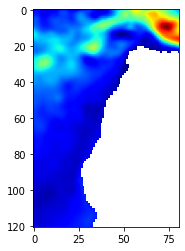

In [ ]:
plt.imshow(d1_SSH[0,:,:].values,cmap='jet')

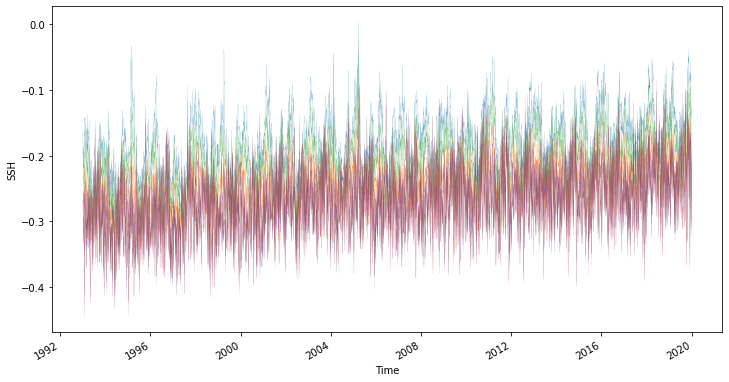

In [ ]:
C_Frio= d1_SSH.sel(lon=11.75,lat=-18.5).drop(['lat','lon'])
C_Luderitz= d1_SSH.sel(lon=14.75,lat=-26.5).drop(['lat','lon'])
C_Walvis= d1_SSH.sel(lon=14.25,lat=-22.5).drop(['lat','lon'])
C_Namaqualand= d1_SSH.sel(lon=17.25,lat=-30.5).drop(['lat','lon'])
C_Elena= d1_SSH.sel(lon=18,lat=-32.5).drop(['lat','lon'])
C_Cape= d1_SSH.sel(lon=18,lat=-33.5).drop(['lat','lon'])
plt.figure(figsize=(12,6))
C_Frio.plot(linewidth=0.1)
C_Luderitz.plot(linewidth=0.1)
C_Walvis.plot(linewidth=0.1)
C_Namaqualand.plot(linewidth=0.1)
C_Elena.plot(linewidth=0.1)
C_Cape.plot(linewidth=0.1)

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_C=pd.concat([C_Frio.to_dataframe(),C_Luderitz.to_dataframe(),C_Walvis.to_dataframe(),C_Namaqualand.to_dataframe(),C_Elena.to_dataframe(),C_Cape.to_dataframe()],axis=1)
df_C.columns=['Cap Frio','Luderitz','Walvis Bay','Namaqualand','Saint Elena Bay','Cape Town']
df_C.to_csv('SSH_Benguela.csv',index=True,sep=',')
df_C.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Cap Frio,Luderitz,Walvis Bay,Namaqualand,Saint Elena Bay,Cape Town
time,,,,,,
1993-01-01,-0.159096,-0.232119,-0.187303,-0.280363,-0.285742,-0.271782
1993-01-02,-0.177092,-0.234607,-0.197175,-0.279182,-0.284562,-0.267237
1993-01-03,-0.192172,-0.235485,-0.209593,-0.273294,-0.279840,-0.273291
1993-01-04,-0.198264,-0.231492,-0.212362,-0.258220,-0.256162,-0.255749
1993-01-05,-0.193765,-0.238887,-0.219157,-0.266696,-0.265462,-0.249964


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
C_H=d1_SSH.groupby('lat').mean('lon').to_dataframe().reset_index()
C_H.to_csv('Hovmoller_SSH_Benguela.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Rotor de viento

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_Rotor_Viento/Benguela/Data_anual/'
var = 'wind_stress_curl' # elegir la variable de interes
ifile='GLOBAL_Rotor_Viento.nc'
d1_Rotor = xr.open_dataset(ifile)[var] # filtrar la variable del archivo de interes
#d1_Rotor=d1_Rotor.sel(time=filtro_meses(d1_Rotor['time.month']))
d1_Rotor.lon.values[d1_Rotor.lon.values < 0] = d1_Rotor.lon.values[d1_Rotor.lon.values < 0] + 360 # convertir a 0-360 ªE
d1_Rotor

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_Rotor_Viento/Benguela/Data_anual


<xarray.DataArray 'wind_stress_curl' (time: 9861, lat: 121, lon: 81)>
[96647661 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31
  * lat      (lat) float32 -40.0 -39.75 -39.5 -39.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float32 5.0 5.25 5.5 5.75 6.0 ... 24.0 24.25 24.5 24.75 25.0

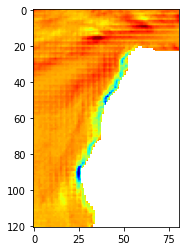

In [ ]:
plt.imshow(d1_Rotor.isel(time=0).values,cmap='jet')

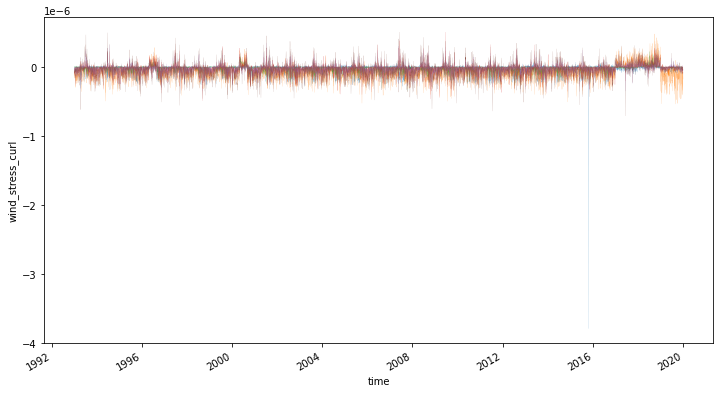

In [ ]:
C_Frio= d1_Rotor.sel(lon=11.75,lat=-18.5).drop(['lat','lon'])
C_Luderitz= d1_Rotor.sel(lon=14.75,lat=-26.5).drop(['lat','lon'])
C_Walvis= d1_Rotor.sel(lon=14.25,lat=-22.5).drop(['lat','lon'])
C_Namaqualand= d1_Rotor.sel(lon=17.25,lat=-30.5).drop(['lat','lon'])
C_Elena= d1_Rotor.sel(lon=18,lat=-32.5).drop(['lat','lon'])
C_Cape= d1_Rotor.sel(lon=18,lat=-33.5).drop(['lat','lon'])
plt.figure(figsize=(12,6))
C_Frio.plot(linewidth=0.1)
C_Luderitz.plot(linewidth=0.1)
C_Walvis.plot(linewidth=0.1)
C_Namaqualand.plot(linewidth=0.1)
C_Elena.plot(linewidth=0.1)
C_Cape.plot(linewidth=0.1)

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_C=pd.concat([C_Frio.to_dataframe(),C_Luderitz.to_dataframe(),C_Walvis.to_dataframe(),C_Namaqualand.to_dataframe(),C_Elena.to_dataframe(),C_Cape.to_dataframe()],axis=1)
df_C.columns=['Cap Frio','Luderitz','Walvis Bay','Namaqualand','Saint Elena Bay','Cape Town']
df_C.to_csv('Rotor_Benguela.csv',index=True,sep=',')
df_C.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Cap Frio,Luderitz,Walvis Bay,Namaqualand,Saint Elena Bay,Cape Town
time,,,,,,
1993-01-01,-9.499490e-08,-8.242205e-08,-5.122274e-09,-1.001172e-07,-3.981404e-08,-3.003515e-08
1993-01-02,0.000000e+00,-5.750917e-08,0.000000e+00,-8.009374e-08,-5.750917e-08,-8.754432e-08
1993-01-03,0.000000e+00,-1.490116e-08,0.000000e+00,-4.470348e-08,-3.003515e-08,-8.987263e-08
1993-01-04,0.000000e+00,-4.726462e-08,0.000000e+00,-3.492460e-08,-1.234002e-08,-5.727634e-08
1993-01-05,0.000000e+00,-1.350418e-07,0.000000e+00,-8.987263e-08,-3.259629e-08,-6.239861e-08


In [ ]:
np.nanmin(d1_Rotor.values),np.nanmax(d1_Rotor.values)

(-6.789807230234146e-06, 5.777226760983467e-06)

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
R_H=d1_Rotor.groupby('lat').mean('lon').to_dataframe().reset_index()
#R_H
R_H.to_csv('Hovmoller_Rotor_Benguela.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Estres viento

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_Estres_Viento/Benguela/Data_anual/'
var = 'wind_stress' # elegir la variable de interes
ifile='GLOBAL_Estres_Viento.nc'
d1_Estres = xr.open_dataset(ifile)[var] # filtrar la variable del archivo de interes
#d1_Estres=d1_Estres.sel(time=filtro_meses(d1_Estres['time.month']))
d1_Estres.lon.values[d1_Estres.lon.values < 0] = d1_Estres.lon.values[d1_Estres.lon.values < 0] + 360 # convertir a 0-360 ªE
d1_Estres

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_Estres_Viento/Benguela/Data_anual


<xarray.DataArray 'wind_stress' (time: 9861, lat: 121, lon: 81)>
[96647661 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31
  * lat      (lat) float32 -40.0 -39.75 -39.5 -39.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float32 5.0 5.25 5.5 5.75 6.0 ... 24.0 24.25 24.5 24.75 25.0

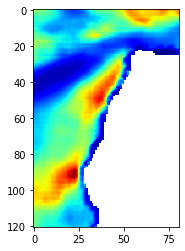

In [ ]:
plt.imshow(d1_Estres.isel(time=0).values,cmap='jet')

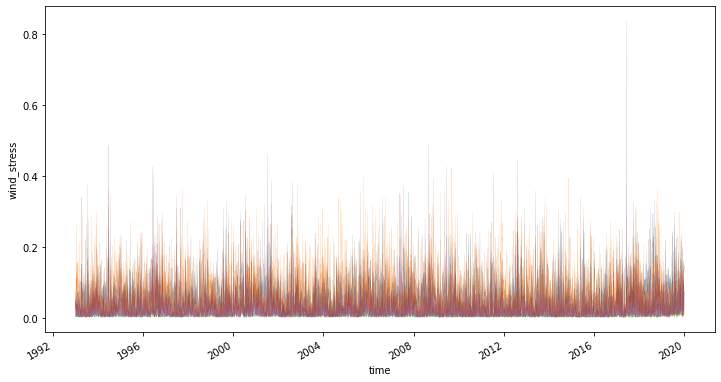

In [ ]:
C_Frio= d1_Estres.sel(lon=11.75,lat=-18.5).drop(['lat','lon'])
C_Luderitz= d1_Estres.sel(lon=14.75,lat=-26.5).drop(['lat','lon'])
C_Walvis= d1_Estres.sel(lon=14.25,lat=-22.5).drop(['lat','lon'])
C_Namaqualand= d1_Estres.sel(lon=17.25,lat=-30.5).drop(['lat','lon'])
C_Elena= d1_Estres.sel(lon=18,lat=-32.5).drop(['lat','lon'])
C_Cape= d1_Estres.sel(lon=18,lat=-33.5).drop(['lat','lon'])
plt.figure(figsize=(12,6))
C_Frio.plot(linewidth=0.1)
C_Luderitz.plot(linewidth=0.1)
C_Walvis.plot(linewidth=0.1)
C_Namaqualand.plot(linewidth=0.1)
C_Elena.plot(linewidth=0.1)
C_Cape.plot(linewidth=0.1)

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_C=pd.concat([C_Frio.to_dataframe(),C_Luderitz.to_dataframe(),C_Walvis.to_dataframe(),C_Namaqualand.to_dataframe(),C_Elena.to_dataframe(),C_Cape.to_dataframe()],axis=1)
df_C.columns=['Cap Frio','Luderitz','Walvis Bay','Namaqualand','Saint Elena Bay','Cape Town']
df_C.to_csv('Estres_Benguela.csv',index=True,sep=',')
df_C.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Cap Frio,Luderitz,Walvis Bay,Namaqualand,Saint Elena Bay,Cape Town
time,,,,,,
1993-01-01,0.036924,0.058174,0.009026,0.043800,0.015600,0.020126
1993-01-02,0.042974,0.025749,0.002775,0.049675,0.015825,0.042252
1993-01-03,0.015474,0.007101,0.001200,0.021748,0.006674,0.050224
1993-01-04,0.008999,0.018026,0.009476,0.014423,0.003052,0.028000
1993-01-05,0.003500,0.068501,0.001574,0.044174,0.013977,0.030649


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
E_H=d1_Estres.groupby('lat').mean('lon').to_dataframe().reset_index()
E_H.to_csv('Hovmoller_Estres_Benguela.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## MLD

In [2]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_MLD_Diario/Benguela/Data_anual/'
var = 'MLD' # elegir la variable de interes
ifile='GLOBAL_REANALYSIS_PHY_MLD.nc'
d1_MLD = xr.open_dataset(ifile)[var] # filtrar la variable del archivo de interes
#d1_MLD=d1_MLD.sel(time=filtro_meses(d1_MLD['time.month']))
d1_MLD.lon.values[d1_MLD.lon.values < 0] = d1_MLD.lon.values[d1_MLD.lon.values < 0] + 360 # convertir a 0-360 ªE
d1_MLD

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_MLD_Diario/Benguela/Data_anual


<xarray.DataArray 'MLD' (time: 9861, lat: 121, lon: 81)>
[96647661 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 5.0 5.25 5.5 5.75 6.0 ... 24.0 24.25 24.5 24.75 25.0
  * lat      (lat) float32 -40.0 -39.75 -39.5 -39.25 ... -10.5 -10.25 -10.0
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31

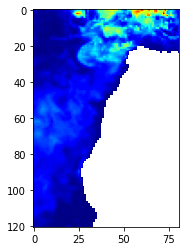

In [3]:
plt.imshow(d1_MLD.isel(time=0).values,cmap='jet')

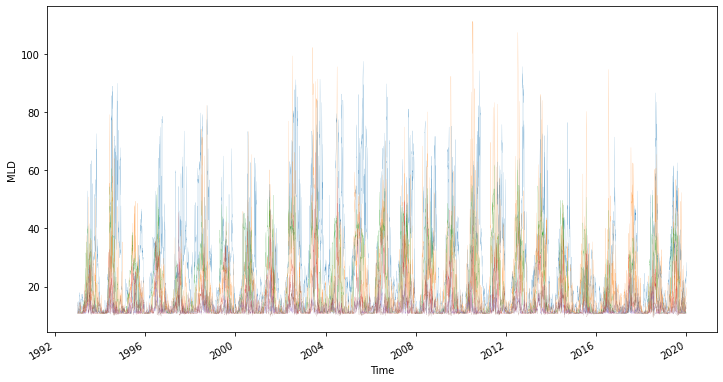

In [4]:
C_Frio= d1_MLD.sel(lon=11.75,lat=-18.5).drop(['lat','lon'])
C_Luderitz= d1_MLD.sel(lon=14.75,lat=-26.5).drop(['lat','lon'])
C_Walvis= d1_MLD.sel(lon=14.25,lat=-22.5).drop(['lat','lon'])
C_Namaqualand= d1_MLD.sel(lon=17.25,lat=-30.5).drop(['lat','lon'])
C_Elena= d1_MLD.sel(lon=18,lat=-32.5).drop(['lat','lon'])
C_Cape= d1_MLD.sel(lon=18,lat=-33.5).drop(['lat','lon'])
plt.figure(figsize=(12,6))
C_Frio.plot(linewidth=0.1)
C_Luderitz.plot(linewidth=0.1)
C_Walvis.plot(linewidth=0.1)
C_Namaqualand.plot(linewidth=0.1)
C_Elena.plot(linewidth=0.1)
C_Cape.plot(linewidth=0.1)

In [5]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_C=pd.concat([C_Frio.to_dataframe(),C_Luderitz.to_dataframe(),C_Walvis.to_dataframe(),C_Namaqualand.to_dataframe(),C_Elena.to_dataframe(),C_Cape.to_dataframe()],axis=1)
df_C.columns=['Cap Frio','Luderitz','Walvis Bay','Namaqualand','Saint Elena Bay','Cape Town']
df_C.to_csv('MLD_Benguela.csv',index=True,sep=',')
df_C.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Cap Frio,Luderitz,Walvis Bay,Namaqualand,Saint Elena Bay,Cape Town
time,,,,,,
1993-01-01,14.700524,11.133497,10.951530,10.767898,10.893854,14.466593
1993-01-02,13.995502,11.083834,10.843592,10.767898,10.881101,13.359904
1993-01-03,14.067482,11.169548,10.756211,10.767898,11.405406,13.516002
1993-01-04,13.800308,10.954597,10.767898,10.767898,11.256264,13.367544
1993-01-05,13.190664,10.767396,10.709839,10.767898,10.782797,11.470860


In [6]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
E_H=d1_MLD.groupby('lat').mean('lon').to_dataframe().reset_index()
E_H.to_csv('Hovmoller_MLD_Benguela.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia
